# Numerical data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
X_train['Age_Imputed']=X_train['Age']
X_test['Age_Imputed']=X_test['Age']

In [9]:
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_Imputed'][X_test['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\AS\AppData\Local\Temp\ipykernel_9076\1429987542.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='original')
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AS\AppData\Local\Temp\ipykernel_9076\1429987542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

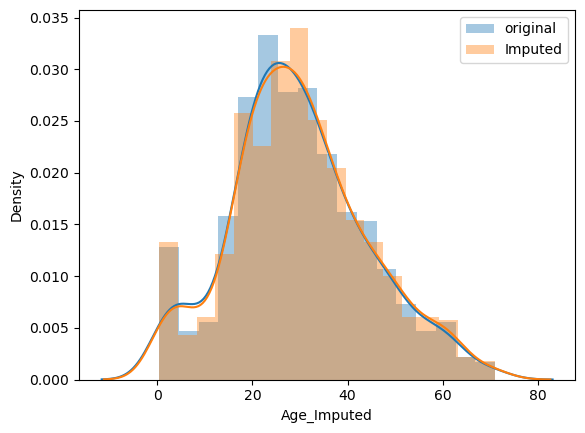

In [10]:
import seaborn as sns
sns.distplot(X_train['Age'],label='original')
sns.distplot(X_train['Age_Imputed'],label='Imputed')
plt.legend()
plt.show()

C:\Users\AS\AppData\Local\Temp\ipykernel_9076\1674655787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='original',hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AS\AppData\Local\Temp\ipykernel_9076\1674655787.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fu

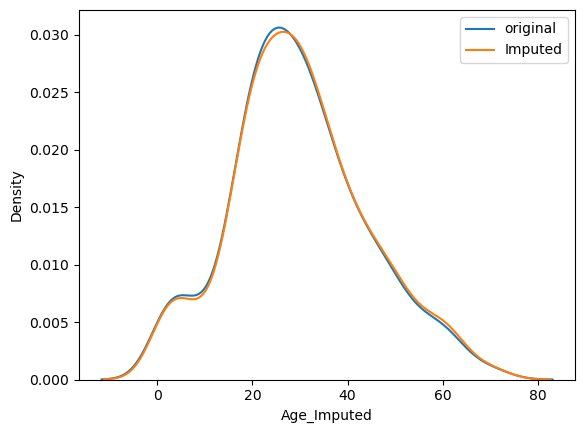

In [11]:
sns.distplot(X_train['Age'],label='original',hist=False)
sns.distplot(X_train['Age_Imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [12]:
print('original variable variance:',X_train['Age'].var())
print('variance after random imputation:',X_train['Age_Imputed'].var())

original variable variance: 204.3495133904614
variance after random imputation: 207.08665263673592


In [13]:
X_train[['Fare','Age','Age_Imputed']].cov()

,Fare,Age,Age_Imputed
Fare,2368.246832,71.512440,51.702843
Age,71.512440,204.349513,204.349513
Age_Imputed,51.702843,204.349513,207.086653


<Axes: >

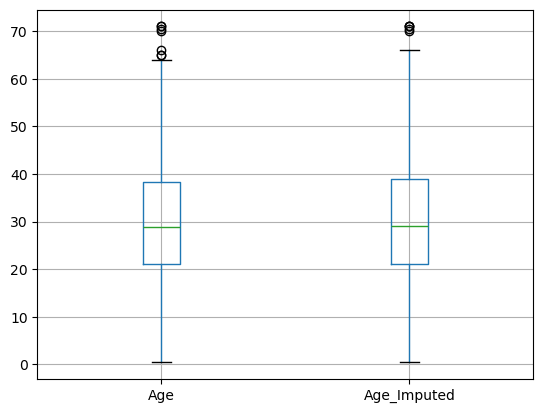

In [14]:
X_train[['Age','Age_Imputed']].boxplot()

# Categorical Data

In [15]:
data=pd.read_csv('train_cat.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [16]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [17]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [18]:
x=data
y=data['SalePrice']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
X_train['GarageQual_Imputed']=X_train['GarageQual']
X_test['GarageQual_Imputed']=X_test['GarageQual']

X_train['FireplaceQu_imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_imputed']=X_test['FireplaceQu']

In [21]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_Imputed,FireplaceQu_imputed
833,NaN,TA,167000,TA,NaN
329,NaN,Fa,78000,Fa,NaN
466,Po,TA,167000,TA,Po
271,TA,TA,241500,TA,TA
1247,NaN,TA,169900,TA,NaN


In [22]:
X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\AS\AppData\Local\Temp\ipykernel_9076\759565225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\AS\AppData\Local\Temp\ipykernel_9076\759565225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\AS\AppData\Local\Temp\ipykernel_9076\759565225.py:3: SettingWithCopyWarning: 
A value is trying to

In [25]:
temp=pd.concat(
    [
      X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
      X_train['GarageQual_Imputed'].value_counts()/len(X_train)  
    ],axis=1
)

In [26]:
temp.columns=['original','Imputed']

In [27]:
temp

,original,Imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [28]:
temp=pd.concat(
    [
      X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
      X_train['FireplaceQu_imputed'].value_counts()/len(X_train)  
    ],axis=1
)

In [29]:
temp.columns=['original','Imputed']

In [30]:
temp

,original,Imputed
Gd,0.494272,0.498288
TA,0.412439,0.408390
Fa,0.040917,0.041096
Po,0.027823,0.027397
Ex,0.024550,0.024829
